In [2]:
from glyze import FattyAcid, Glyceride, ChemReactSim
from rdkit import Chem
from rdkit.Chem import AllChem
from tabulate import tabulate
import pandas as pd
import csv

# data set
fa2 = FattyAcid(length=2)
fa3 = FattyAcid(length=3)
fa4 = FattyAcid(length=4)
fa5 = FattyAcid(length=5)
fa6 = FattyAcid(length=6)
fa7 = FattyAcid(length=7)
fa8 = FattyAcid(length=8)
fa9 = FattyAcid(length=9)
fa10 = FattyAcid(length=10)
fa11 = FattyAcid(length=11)
fa12 = FattyAcid(length=12)
fa13 = FattyAcid(length=13)
fa14 = FattyAcid(length=14)
fa15 = FattyAcid(length=15)
fa16 = FattyAcid(length=16)
fa17 = FattyAcid(length=17)
fa18 = FattyAcid(length=18)
fa19 = FattyAcid(length=19)
fa20 = FattyAcid(length=20)
fa21 = FattyAcid(length=21)
fa22 = FattyAcid(length=22)

# glycerol
Gly = Glyceride(sn=(None, None, None))
# print(Gly.name)
glym = Gly.molar_mass
# print(glym)

# sanity check:
mct = Glyceride(sn=(fa8, fa8, fa10))
mctm = mct.molar_mass

# water
"""Calculate the molar mass of the water in g/mol"""
# Build RDkit molecule and sum atomic masses
# Initialize empty RWMol
rw = Chem.RWMol()
# oxygen
o = rw.AddAtom(Chem.Atom(8)) 

# Connect to water
mol = rw.GetMol()
Chem.SanitizeMol(mol)
mol = Chem.AddHs(mol)

h2omass = 0
for atom in mol.GetAtoms():
    h2omass += atom.GetMass()

# testing for esterification
list_of_fa=[fa8, fa10]
sim = ChemReactSim.p_kinetic_esterification(list_of_fa, initial_conc = [1.1, 0.5, 0.5], chem_flag=True)
sim.overall_order = 2
sol1 = sim.solve(t_span=(0.0, 2))
# sim.plot(sol=sol1)

# tabulated form
inital_conc = sol1.y[:, 0]
final_conc = sol1.y[:, -1]
sp_mass = sim.masses
inital_mass = inital_conc*sp_mass
final_mass = final_conc*sp_mass
total_initial_mass = sum(inital_mass)
total_final_mass = sum(final_mass)
table = [*zip(sim.species_names, inital_conc, final_conc, inital_mass, final_mass)]
print(tabulate(table, headers=["Species","Inital Concentration", "Final Concentration", "Inital Mass", "Final Mass"], floatfmt=".6g"))
summary_table = [
    ["Total Initial Mass", total_initial_mass],
    ["Total Final Mass", total_final_mass]
]
print(tabulate(summary_table, headers=["", "Mass"], floatfmt=".6g"))

# csv for table
tabledf = pd.DataFrame({
    "Species": sim.species_names,
    "Initial Concentration": inital_conc,
    "Final Concentration": final_conc,
    "Initial Mass": inital_mass,
    "Final Mass": final_mass
})

# tabledf.to_csv("MCT8_10esterification.csv", index=False)

# obtatining species names for deoderization
speciesnaming = sim.species_names
list_of_mixture = [Glyceride.from_name(speciesnaming[0])]
# print(Glyceride.from_name(speciesnaming[0]))
# print(list_of_mixture)
lists_of_glys = [Glyceride.from_name(name) for name in speciesnaming[2+len(list_of_fa):]]
list_of_mixture.extend(list_of_fa)
list_of_mixture.extend(lists_of_glys)
# print(list_of_fa)
# print(len(list_of_mixture))
# print(list_of_mixture)
# print(list_of_mixture[0])

# dictionary of mixtures (for display and for extraction)
dict_of_mixture = {}
# dict_of_mixture[speciesnaming[0]] = list_of_mixture[0], final_conc[0]
# print(len(speciesnaming)-2)
for i in range(len(speciesnaming)-4):
    dict_of_mixture[speciesnaming[i+4]] = speciesnaming[i+4], lists_of_glys[i], final_conc[i+4]

# csv for dictionary
# dictionary of mixtures (for display and for extraction)
# dict_of_mixture = {}
# dict_of_mixture[speciesnaming[0]] = list_of_mixture[0], final_conc[0]
# print(len(speciesnaming)-2)
# for i in range(len(speciesnaming)-2):
#     dict_of_mixture[speciesnaming[i+2]] = list_of_mixture[i+1], final_conc[i+2]
# tabledict = tabulate(dict_of_mixture, headers = ["Species", "Gly name", "Final Concentration"], floatfmt=".6g")
# print(tabledict)
 
# Convert dictionary to DataFrame using 'from_dict'
# orient='index' tells pandas the keys are rows
dictdf = pd.DataFrame.from_dict(dict_of_mixture, orient='index', columns=['Species Name','Mixture List', 'Concentration'])
# dictdf.to_csv("MCT8_10esterificationdictionary.csv", index=False)
# Display the table
print(dictdf) # or just type 'df' if using Jupyter

Species                   Inital Concentration    Final Concentration    Inital Mass    Final Mass
----------------------  ----------------------  ---------------------  -------------  ------------
G_EMPTY_EMPTY_EMPTY                        1.1             0.375845          101.303     34.6131
h2o                                        0               0.992973            0         17.8884
N08D00                                     0.5             0.00351361         72.107      0.506712
N10D00                                     0.5             0.00351361         86.134      0.605283
G_EMPTY_EMPTY_N08D00                       0               0.161769            0         35.3129
G_EMPTY_N08D00_EMPTY                       0               0.0808843           0         17.6565
G_EMPTY_EMPTY_N10D00                       0               0.161769            0         39.8512
G_EMPTY_N10D00_EMPTY                       0               0.0808843           0         19.9256
G_EMPTY_N08D00_N08D00 

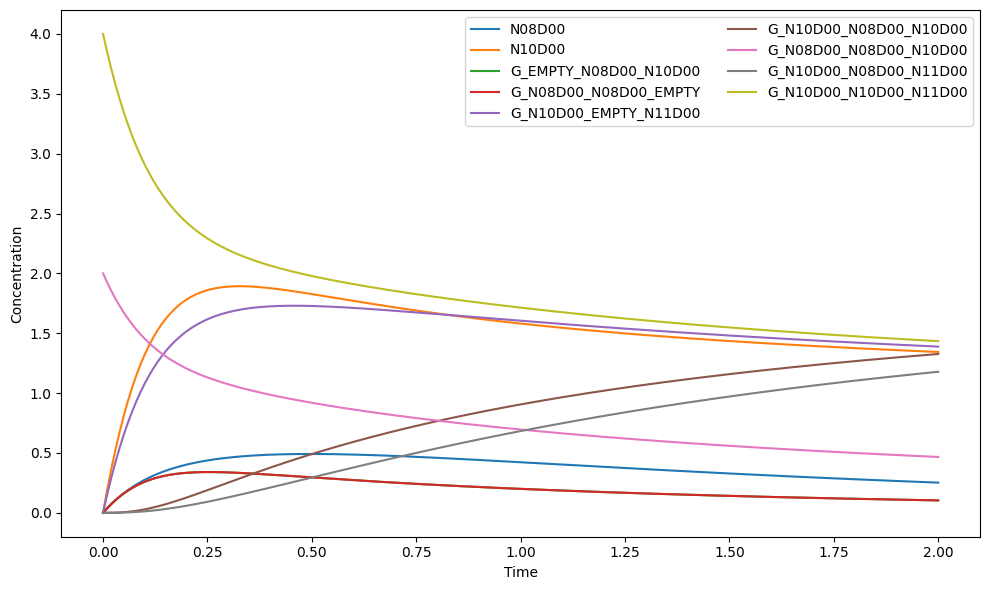

Species                   Inital Concentration    Final Concentration    Inital Mass    Final Mass
----------------------  ----------------------  ---------------------  -------------  ------------
N08D00                                       0               0.251957           0          31.7967
N10D00                                       0               1.34335            0         207.216
G_EMPTY_N08D00_N10D00                        0               0.103587           0          38.5909
G_N08D00_N08D00_EMPTY                        0               0.103587           0          35.6849
G_N10D00_EMPTY_N11D00                        0               1.38813            0         575.558
G_N10D00_N08D00_N10D00                       0               1.32645            0         698.773
G_N08D00_N08D00_N10D00                       2               0.466375         997.49      232.602
G_N10D00_N08D00_N11D00                       0               1.17808            0         637.137
G_N10D00_N10D00

In [ ]:
mct1 = Glyceride(sn=(fa8, fa8, fa10))
mct2 = Glyceride(sn=(fa10, fa10, fa11))
list_of_stuff=[mct1, mct2]
simu = ChemReactSim.p_kinetic_interesterification(list_of_stuff, initial_conc = [2,4], plucked = ["end", "mid"], arranged = ["mid", "end"], chem_flag=True)
simu.overall_order = 2.0
sol2 = simu.solve(t_span=(0.0, 2.0))
# simu.plot(sol=sol2)

# tabulated form
inital_conc2 = sol2.y[:, 0]
final_conc2 = sol2.y[:, -1]
sp_mass = simu.masses
inital_mass2 = inital_conc2*sp_mass
final_mass2 = final_conc2*sp_mass
total_initial_mass2 = sum(inital_mass2)
total_final_mass2 = sum(final_mass2)
table2 = [*zip(simu.species_names, inital_conc2, final_conc2, inital_mass2, final_mass2)]
print(tabulate(table2, headers=["Species","Inital Concentration", "Final Concentration", "Inital Mass", "Final Mass"], floatfmt=".6g"))
summary_table2 = [
    ["Total Initial Mass", total_initial_mass2],
    ["Total Final Mass", total_final_mass2]
]

# csv for table
table2df = pd.DataFrame({
    "Species": simu.species_names,
    "Initial Concentration": inital_conc2,
    "Final Concentration": final_conc2,
    "Initial Mass": inital_mass2,
    "Final Mass": final_mass2
})

# table2df.to_csv("MCT8_10interesterification.csv", index=False)

print(tabulate(summary_table2, headers=["", "Mass"], floatfmt=".6g"))

# obtatining species names for deoderization
speciesnaming2 = simu.species_names
list_of_mixture2 = []
lists_of_glys2 = [Glyceride.from_name(name) for name in speciesnaming2[2:]]
list_of_mixture2.extend(lists_of_glys2)

# dictionary of mixtures (for display and for extraction)
dict_of_mixture2 = {}
# dict_of_mixture[speciesnaming[0]] = list_of_mixture[0], final_conc[0]
# print(len(speciesnaming)-2)
for i in range(len(speciesnaming2)-2):
    dict_of_mixture2[speciesnaming2[i+2]] = speciesnaming2[i+2], lists_of_glys2[i], final_conc2[i+2]

df2 = pd.DataFrame.from_dict(dict_of_mixture2, orient='index', columns=['Species Name', 'Mixture List', 'Concentration'])
# df2.to_csv("MCT8_10interesterificationdictionary.csv", index=False)
# Display the table
print(df2) # or just type 'df' if using Jupyter